In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
#Image.open()

from sklearn.preprocessing import PowerTransformer

In [7]:
from IPython.display import Image

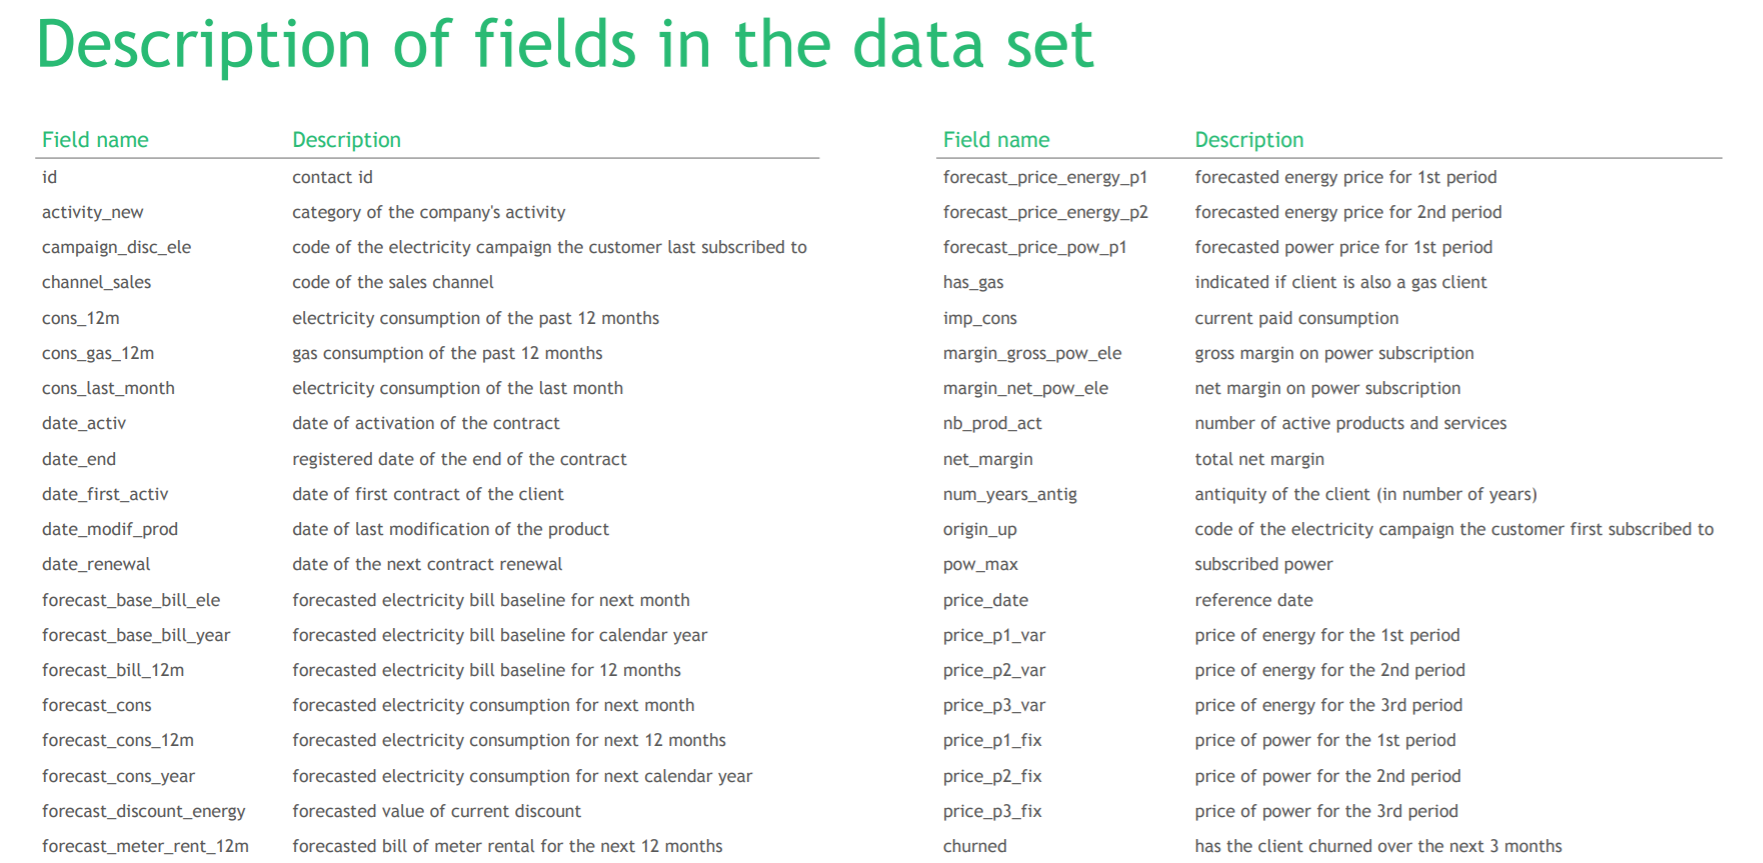

In [8]:
Image(filename = 'description.png')

In [9]:
df_data = pd.read_csv('ml_case_training_data.csv')
df_data.head(2)

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648


In [10]:
df_hist = pd.read_csv('ml_case_training_hist_data.csv')
df_hist.head(2)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [11]:
df_out = pd.read_csv('ml_case_training_output.csv')
df_out.head(2)

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1


In [12]:
df_data.shape, df_hist.shape, df_out.shape

((16096, 32), (193002, 8), (16096, 2))

## ----------------------------------------------------------------------------------------

In [13]:
df_out.isnull().sum()[df_out.isnull().sum() > 0]

Series([], dtype: int64)

In [14]:
df_hist.isnull().sum()[df_hist.isnull().sum() > 0]

price_p1_var    1359
price_p2_var    1359
price_p3_var    1359
price_p1_fix    1359
price_p2_fix    1359
price_p3_fix    1359
dtype: int64

In [15]:
df_hist.isnull().sum()[df_hist.isnull().sum() > 0]/df_hist.shape[0]*100

price_p1_var    0.704138
price_p2_var    0.704138
price_p3_var    0.704138
price_p1_fix    0.704138
price_p2_fix    0.704138
price_p3_fix    0.704138
dtype: float64

In [16]:
df_data.isnull().sum()[df_data.isnull().sum() > 0].sort_values(ascending = False)

campaign_disc_ele           16096
forecast_bill_12m           12588
forecast_cons               12588
date_first_activ            12588
forecast_base_bill_ele      12588
forecast_base_bill_year     12588
activity_new                 9545
channel_sales                4218
date_modif_prod               157
forecast_price_energy_p1      126
forecast_discount_energy      126
forecast_price_energy_p2      126
forecast_price_pow_p1         126
origin_up                      87
date_renewal                   40
net_margin                     15
margin_gross_pow_ele           13
margin_net_pow_ele             13
pow_max                         3
date_end                        2
dtype: int64

In [17]:
(df_data.isnull().sum()[df_data.isnull().sum() > 0]/df_data.shape[0]*100).sort_values(ascending = False)

campaign_disc_ele           100.000000
forecast_bill_12m            78.205765
forecast_cons                78.205765
date_first_activ             78.205765
forecast_base_bill_ele       78.205765
forecast_base_bill_year      78.205765
activity_new                 59.300447
channel_sales                26.205268
date_modif_prod               0.975398
forecast_price_energy_p1      0.782803
forecast_discount_energy      0.782803
forecast_price_energy_p2      0.782803
forecast_price_pow_p1         0.782803
origin_up                     0.540507
date_renewal                  0.248509
net_margin                    0.093191
margin_gross_pow_ele          0.080765
margin_net_pow_ele            0.080765
pow_max                       0.018638
date_end                      0.012425
dtype: float64

In [18]:
df_data.drop('campaign_disc_ele', axis = 1, inplace = True)

## ------------------------------------------------------------------------

In [19]:
df_hist[df_hist['price_p1_var'].isnull()]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
75,ef716222bbd97a8bdfcbb831e3575560,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
221,0f5231100b2febab862f8dd8eaab3f43,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
377,2f93639de582fadfbe3e86ce1c8d8f35,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
413,f83c1ab1ca1d1802bb1df4d72820243c,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
461,3076c6d4a060e12a049d1700d9b09cf3,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
192767,2dc2c9a9f6e6896d9a07d7bcbb9d0ce9,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
192788,e4053a0ad6c55e4665e8e9adb9f75db5,2015-03-01,NaN,NaN,NaN,NaN,NaN,NaN
192875,1a788ca3bfb16ce443dcf7d75e702b5d,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
192876,1a788ca3bfb16ce443dcf7d75e702b5d,2015-07-01,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_data['id'].nunique(), df_hist['id'].nunique(), df_out['id'].nunique()

(16096, 16096, 16096)

In [21]:
df_hist['id'].value_counts().sort_values()

bf89f2d8c1b133a134fd93603cb4c947     7
15b36e47cf04bf151e3f4438d12672e5     7
c5dcd5c506e565aaabffa29bc1ec0a37     7
83cf18b07114e495ae8b7fb235e45ee2     8
223a98d3832ece78cbf279a194868b54     8
                                    ..
17f1399918d9d0d447f9d25f185bd1fa    12
bf2acfbb198d876bd2a08b2d5a6d5d6d    12
15ef6e10bc37a5d852fb32c548c87b1e    12
453d38b7237750949a1d0d4dfafb4143    12
3c1f228f682a7c9d3c923461f77a1eb1    12
Name: id, Length: 16096, dtype: int64

In [22]:
df_hist[df_hist['id'] == 'f0f87b5b9b459886926f3997f51e5270']

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
100446,f0f87b5b9b459886926f3997f51e5270,2015-01-01,0.169578,0.084991,0.0,44.266931,0.0,0.0
100447,f0f87b5b9b459886926f3997f51e5270,2015-02-01,0.169578,0.084991,0.0,44.266931,0.0,0.0
100448,f0f87b5b9b459886926f3997f51e5270,2015-03-01,0.170685,0.087421,0.0,44.444710,0.0,0.0
100449,f0f87b5b9b459886926f3997f51e5270,2015-04-01,0.170685,0.087421,0.0,44.444710,0.0,0.0
100450,f0f87b5b9b459886926f3997f51e5270,2015-05-01,0.170685,0.087421,0.0,44.444710,0.0,0.0
100451,f0f87b5b9b459886926f3997f51e5270,2015-06-01,0.170685,0.087421,0.0,44.444710,0.0,0.0
100452,f0f87b5b9b459886926f3997f51e5270,2015-07-01,0.170685,0.087421,0.0,44.444710,0.0,0.0
100453,f0f87b5b9b459886926f3997f51e5270,2015-08-01,0.166057,0.086668,0.0,44.444710,0.0,0.0
100454,f0f87b5b9b459886926f3997f51e5270,2015-09-01,0.166057,0.086668,0.0,44.444710,0.0,0.0
100455,f0f87b5b9b459886926f3997f51e5270,2015-10-01,0.166057,0.086668,0.0,44.444710,0.0,0.0


In [23]:
df_hist[df_hist['id'] == 'bf89f2d8c1b133a134fd93603cb4c947']

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
84810,bf89f2d8c1b133a134fd93603cb4c947,2015-06-01,0.133958,0.000000,0.000000,37.891254,0.00000,0.000000
84811,bf89f2d8c1b133a134fd93603cb4c947,2015-07-01,0.122274,0.100598,0.070508,40.728885,24.43733,16.291555
84812,bf89f2d8c1b133a134fd93603cb4c947,2015-08-01,0.114113,0.096429,0.070454,40.728885,24.43733,16.291555
84813,bf89f2d8c1b133a134fd93603cb4c947,2015-09-01,0.114113,0.096429,0.070454,40.728885,24.43733,16.291555
84814,bf89f2d8c1b133a134fd93603cb4c947,2015-10-01,0.114113,0.096429,0.070454,40.728885,24.43733,16.291555
84815,bf89f2d8c1b133a134fd93603cb4c947,2015-11-01,0.114113,0.096429,0.070454,40.728885,24.43733,16.291555
84816,bf89f2d8c1b133a134fd93603cb4c947,2015-12-01,0.114113,0.096429,0.070454,40.728885,24.43733,16.291555


In [24]:
df_data[df_data['id'] == 'f0f87b5b9b459886926f3997f51e5270']

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
5862,f0f87b5b9b459886926f3997f51e5270,apdekpcbwosbxepsfxclislboipuxpop,lmkebamcaaclubfxadlmueccxoimlema,763882,0,58593,2011-02-09,2016-02-09,NaN,2011-02-09,...,44.311378,f,657.3,29.64,29.64,1,513.87,5,lxidpiddsbxsbosboudacockeimpuepw,13.15


In [25]:
pd.to_datetime(df_hist['price_date']).dt.year.unique()

array([2015], dtype=int64)

In [26]:
df_data['activity_new'].value_counts()

apdekpcbwosbxepsfxclislboipuxpop    1577
kkklcdamwfafdcfwofuscwfwadblfmce     422
kwuslieomapmswolewpobpplkaooaaew     230
fmwdwsxillemwbbwelxsampiuwwpcdcb     219
ckfxocssowaeipxueikxcmaxdmcduxsa     189
                                    ... 
klaclcdipfdkebisxwccdbdooobmiwpl       1
xpwokbdseslumlsislulloalddkioslw       1
dbklukmppmseoekmmxfolmfbdidmawls       1
dbxlsaldowxpxlxfoueabwbaclmlbuiu       1
iwmoskaicewfewukldfwcdwlxcwwoeom       1
Name: activity_new, Length: 419, dtype: int64

In [27]:
df_data['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7825
kamkkxfxxuwbdslkwifmmcsiusiuosws    4517
ldkssxwpmemidmecebumciepifcamkci    3664
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [28]:
df_hist[df_hist['price_p1_var'].isnull()]['id'].value_counts()

8d7da64122bba29af851e7252ae36484    12
a375227dbd198e4702f2c522c2d78f68    12
33bb3af90650ac2e9ecac6ff2c975a6b     4
822030651e9bb1921f28611322aae09b     4
bd81285c6614859c9fbf1dee110d57ea     3
                                    ..
3f8f7cb53d030439c42bd0e89f4756ef     1
09c6590bb0f13d96fca2dea16c96dd36     1
3f3574cf1f845bfdf39d6e378e3357d0     1
59ef1692844b45a6f62a822c297ca100     1
eafa2b83f2fd1cb661f3baa44a62c651     1
Name: id, Length: 1207, dtype: int64

In [29]:
df_hist[df_hist['id'] == '4664051a277d7981db45e19b57963667']

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
82278,4664051a277d7981db45e19b57963667,2015-01-01,0.153133,0.0,0.0,44.266931,0.0,0.0
82279,4664051a277d7981db45e19b57963667,2015-02-01,0.153133,0.0,0.0,44.266931,0.0,0.0
82280,4664051a277d7981db45e19b57963667,2015-03-01,NaN,NaN,NaN,NaN,NaN,NaN
82281,4664051a277d7981db45e19b57963667,2015-04-01,0.152445,0.0,0.0,44.266931,0.0,0.0
82282,4664051a277d7981db45e19b57963667,2015-05-01,0.152445,0.0,0.0,44.266931,0.0,0.0
82283,4664051a277d7981db45e19b57963667,2015-06-01,0.152445,0.0,0.0,44.266930,0.0,0.0
82284,4664051a277d7981db45e19b57963667,2015-07-01,0.152445,0.0,0.0,44.266930,0.0,0.0
82285,4664051a277d7981db45e19b57963667,2015-08-01,0.147983,0.0,0.0,44.266930,0.0,0.0
82286,4664051a277d7981db45e19b57963667,2015-09-01,0.147983,0.0,0.0,44.266930,0.0,0.0
82287,4664051a277d7981db45e19b57963667,2015-10-01,0.147983,0.0,0.0,44.266930,0.0,0.0


In [30]:
df_hist[df_hist['id'] == 'a375227dbd198e4702f2c522c2d78f68']

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
124869,a375227dbd198e4702f2c522c2d78f68,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN
124870,a375227dbd198e4702f2c522c2d78f68,2015-02-01,NaN,NaN,NaN,NaN,NaN,NaN
124871,a375227dbd198e4702f2c522c2d78f68,2015-03-01,NaN,NaN,NaN,NaN,NaN,NaN
124872,a375227dbd198e4702f2c522c2d78f68,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
124873,a375227dbd198e4702f2c522c2d78f68,2015-05-01,NaN,NaN,NaN,NaN,NaN,NaN
124874,a375227dbd198e4702f2c522c2d78f68,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
124875,a375227dbd198e4702f2c522c2d78f68,2015-07-01,NaN,NaN,NaN,NaN,NaN,NaN
124876,a375227dbd198e4702f2c522c2d78f68,2015-08-01,NaN,NaN,NaN,NaN,NaN,NaN
124877,a375227dbd198e4702f2c522c2d78f68,2015-09-01,NaN,NaN,NaN,NaN,NaN,NaN
124878,a375227dbd198e4702f2c522c2d78f68,2015-10-01,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df_hist[df_hist['price_p1_var'].isnull()]['id'].nunique()

1207

In [32]:
idn = df_hist[df_hist['price_p1_var'].isnull()]['id'].unique()

In [33]:
dfv = pd.DataFrame(df_hist['id'].value_counts().sort_values())
dfv.shape, dfv[dfv['id'] == 12].shape

((16096, 1), (15990, 1))

In [34]:
cnt = 0
idna = []
for i in idn:
    if(i in dfv[dfv['id'] == 12].index):
        cnt += 1
    else:
        idna.append(i)
print(cnt)
print(idna)

1194
['acfed39820e3735a1f5f5501163575f9', '223a98d3832ece78cbf279a194868b54', '85781e805f208ddbcd9eeac081ed2615', 'c8abd7e8995acb6a8c7fd3b96ed33137', '43ed7bbc78b5c07fe823e013c72d2fd7', '2ec53c06827d5195fba92e1102644119', 'a518b13ac2966bdc50b459e6849e1669', '9f080126baa731baf2fb5535ab8f067d', 'cdbf963a4e179eca4a91e3b660184588', 'afd21b4e10b01f841131bf56259a2e91', '44ce0e2cececf2e92ecfa0c2be67593b', 'f211c15b87e6fd9ed7eb7e33757f9d1a', '90231cb13c8a4a274260e3c912fa81cb']


In [35]:
dfv.loc[idna,:]

,id
acfed39820e3735a1f5f5501163575f9,11
223a98d3832ece78cbf279a194868b54,8
85781e805f208ddbcd9eeac081ed2615,9
c8abd7e8995acb6a8c7fd3b96ed33137,11
43ed7bbc78b5c07fe823e013c72d2fd7,11
2ec53c06827d5195fba92e1102644119,11
a518b13ac2966bdc50b459e6849e1669,11
9f080126baa731baf2fb5535ab8f067d,11
cdbf963a4e179eca4a91e3b660184588,11
afd21b4e10b01f841131bf56259a2e91,11


In [36]:
df_hist[df_hist['id'] == 'c8abd7e8995acb6a8c7fd3b96ed33137']

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
59353,c8abd7e8995acb6a8c7fd3b96ed33137,2015-02-01,0.148159,0.0,0.0,44.266931,0.0,0.0
59354,c8abd7e8995acb6a8c7fd3b96ed33137,2015-03-01,0.148159,0.0,0.0,44.266931,0.0,0.0
59355,c8abd7e8995acb6a8c7fd3b96ed33137,2015-04-01,0.148159,0.0,0.0,44.266930,0.0,0.0
59356,c8abd7e8995acb6a8c7fd3b96ed33137,2015-05-01,0.148159,0.0,0.0,44.266930,0.0,0.0
59357,c8abd7e8995acb6a8c7fd3b96ed33137,2015-06-01,0.148159,0.0,0.0,44.266930,0.0,0.0
59358,c8abd7e8995acb6a8c7fd3b96ed33137,2015-07-01,0.148159,0.0,0.0,44.266930,0.0,0.0
59359,c8abd7e8995acb6a8c7fd3b96ed33137,2015-08-01,0.143715,0.0,0.0,44.266930,0.0,0.0
59360,c8abd7e8995acb6a8c7fd3b96ed33137,2015-09-01,0.143715,0.0,0.0,44.266930,0.0,0.0
59361,c8abd7e8995acb6a8c7fd3b96ed33137,2015-10-01,NaN,NaN,NaN,NaN,NaN,NaN
59362,c8abd7e8995acb6a8c7fd3b96ed33137,2015-11-01,0.143118,0.0,0.0,44.266930,0.0,0.0


In [37]:
df_hist = df_hist.drop(df_hist[df_hist['id'] == 'a375227dbd198e4702f2c522c2d78f68'].index)
df_hist = df_hist.drop(df_hist[df_hist['id'] == '8d7da64122bba29af851e7252ae36484'].index)
df_hist.shape

(192978, 8)

In [38]:
df_hist = df_hist.fillna(method = 'bfill')

In [39]:
df_hist.isnull().sum()[df_hist.isnull().sum() > 0]

Series([], dtype: int64)

In [40]:
df_hist.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,192978.000000,192978.000000,192978.000000,192978.000000,192978.000000,192978.000000
mean,0.141006,0.054384,0.030693,43.326504,10.691056,6.451251
std,0.025108,0.050040,0.036334,5.434854,12.854619,7.781550
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085450,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


#### ------------------------------------------------------------

In [41]:
df_data['year_activ'] = pd.to_datetime(df_data['date_activ']).dt.year

In [42]:
pd.to_datetime(df_data['date_activ']).dt.year.value_counts()

2012    4091
2010    3881
2011    2971
2009    2824
2013    1391
2008     317
2005     252
2004     162
2007     116
2003      46
2006      42
2014       1
2001       1
2000       1
Name: date_activ, dtype: int64

In [43]:
df_data['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    7377
lmkebamcaaclubfxadlmueccxoimlema    2073
usilxuppasemubllopkaafesmlibmsdf    1444
ewpakwlliwisiwduibdlfmalxowmwpci     966
sddiedcslfslkckwlfkdpoeeailfpeds      12
epumfxlbckeskwekxbiuasklxalciiuu       4
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [44]:
pd.crosstab(df_data['year_activ'], df_data['channel_sales'])

channel_sales,epumfxlbckeskwekxbiuasklxalciiuu,ewpakwlliwisiwduibdlfmalxowmwpci,fixdbufsefwooaasfcxdxadsiekoceaa,foosdfpfkusacimwkcsosbicdxkicaua,lmkebamcaaclubfxadlmueccxoimlema,sddiedcslfslkckwlfkdpoeeailfpeds,usilxuppasemubllopkaafesmlibmsdf
year_activ,,,,,,,
2005,0,0,0,1,25,0,0
2006,0,0,0,1,1,0,0
2007,0,0,0,4,2,0,0
2008,0,0,0,22,14,0,0
2009,0,0,0,887,227,0,0
2010,0,266,0,1311,956,0,82
2011,0,153,0,1407,396,0,683
2012,0,364,0,2763,354,0,579
2013,4,183,2,980,98,12,100


In [45]:
df_data[df_data['channel_sales'].isnull()]['year_activ'].value_counts().sort_index()

2000       1
2001       1
2003      46
2004     162
2005     226
2006      40
2007     110
2008     281
2009    1710
2010    1266
2011     332
2012      31
2013      12
Name: year_activ, dtype: int64

In [46]:
df_data.drop('channel_sales', axis = 1, inplace = True)

In [47]:
df_data[df_data['date_end'].isnull()]

,id,activity_new,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,year_activ
4452,f7aed20b79f48e9e87687dc74fc6a353,ilkfsaapsxpkcpswbllddfmpamwelpxi,107905,0,0,2013-06-19,NaN,2010-04-19,NaN,NaN,...,f,0.00,-2.96,-2.96,1,768.69,3,lxidpiddsbxsbosboudacockeimpuepw,35.000,2013
12880,ec6c8b46866d76e99623ddcf9d334835,mloxfblllfoxllsffauklsewwfcfdlls,18954,0,1596,2010-09-06,NaN,NaN,2015-05-24,NaN,...,f,159.27,29.94,29.94,1,-168.49,5,lxidpiddsbxsbosboudacockeimpuepw,62.354,2010


In [48]:
df_data

,id,activity_new,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,year_activ
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,...,f,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,2012
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,2013
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,2009
3,764c75f661154dac3a6c254cd082ea7d,NaN,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,2010
4,bba03439a292a1e166f80264c16191cb,NaN,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,NaN,32270,47940,0,2012-05-24,2016-05-08,NaN,2015-05-08,2014-05-26,...,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,2012
16092,d0a6f71671571ed83b2645d23af6de00,NaN,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2012-08-27,2015-08-28,...,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,2012
16093,10e6828ddd62cbcf687cb74928c4c2d2,NaN,1844,0,179,2012-02-08,2016-02-07,NaN,2012-02-08,2015-02-09,...,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,2012
16094,1cf20fd6206d7678d5bcafd28c53b4db,NaN,131,0,0,2012-08-30,2016-08-30,NaN,2012-08-30,2015-08-31,...,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,2012


In [49]:
dfcr = pd.crosstab(df_data['year_activ'], df_data['origin_up'])
dfcr

origin_up,ewxeelcelemmiwuafmddpobolfuxioce,kamkkxfxxuwbdslkwifmmcsiusiuosws,ldkssxwpmemidmecebumciepifcamkci,lxidpiddsbxsbosboudacockeimpuepw,usapbepcfoloekilkwsdiboslwaxobdp
year_activ,,,,,
2000,0,0,1,0,0
2001,0,0,1,0,0
2003,0,0,45,1,0
2004,0,0,155,5,0
2005,0,0,228,23,0
2006,0,0,36,6,0
2007,0,0,50,64,0
2008,0,0,264,47,0
2009,1,1507,845,465,0


In [50]:
df_data[df_data['origin_up'].isnull()].shape

(87, 31)

In [51]:
df_data[df_data['origin_up'].isnull()]['year_activ'].value_counts().sort_index()

2004     2
2005     1
2007     2
2008     6
2009     6
2010    20
2011    15
2012    27
2013     8
Name: year_activ, dtype: int64

In [52]:
col = dfcr.columns
dic = dict()
for i in dfcr.index:
    dic[i] = col[dfcr.loc[i, :].argmax()]
dic

{2000: 'ldkssxwpmemidmecebumciepifcamkci',
 2001: 'ldkssxwpmemidmecebumciepifcamkci',
 2003: 'ldkssxwpmemidmecebumciepifcamkci',
 2004: 'ldkssxwpmemidmecebumciepifcamkci',
 2005: 'ldkssxwpmemidmecebumciepifcamkci',
 2006: 'ldkssxwpmemidmecebumciepifcamkci',
 2007: 'lxidpiddsbxsbosboudacockeimpuepw',
 2008: 'ldkssxwpmemidmecebumciepifcamkci',
 2009: 'kamkkxfxxuwbdslkwifmmcsiusiuosws',
 2010: 'kamkkxfxxuwbdslkwifmmcsiusiuosws',
 2011: 'lxidpiddsbxsbosboudacockeimpuepw',
 2012: 'lxidpiddsbxsbosboudacockeimpuepw',
 2013: 'lxidpiddsbxsbosboudacockeimpuepw',
 2014: 'lxidpiddsbxsbosboudacockeimpuepw'}

In [53]:
for i in df_data[df_data['origin_up'].isnull()].index:
    df_data.loc[i, 'origin_up'] = dic[df_data.loc[i, 'year_activ']]

In [54]:
df_data.isnull().sum()[df_data.isnull().sum() > 0].sort_values(ascending = False)

forecast_cons               12588
forecast_bill_12m           12588
date_first_activ            12588
forecast_base_bill_ele      12588
forecast_base_bill_year     12588
activity_new                 9545
date_modif_prod               157
forecast_price_energy_p1      126
forecast_discount_energy      126
forecast_price_energy_p2      126
forecast_price_pow_p1         126
date_renewal                   40
net_margin                     15
margin_gross_pow_ele           13
margin_net_pow_ele             13
pow_max                         3
date_end                        2
dtype: int64

In [55]:
df_data['pow_max'].nunique()

867

In [56]:
df_data[df_data['pow_max'].isnull()]

,id,activity_new,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,year_activ
186,55618d3b14bf4f4fbf089d8f297623bc,NaN,66383,12,6077,2011-05-06,2016-10-16,NaN,2013-12-23,2015-10-17,...,t,543.67,NaN,NaN,2,NaN,5,lxidpiddsbxsbosboudacockeimpuepw,NaN,2011
1046,73e6a37c773873242484d2318c6d12fd,NaN,13914,0,1677,2012-07-13,2016-07-13,NaN,2012-07-13,2015-07-15,...,f,46.15,NaN,NaN,1,NaN,4,lxidpiddsbxsbosboudacockeimpuepw,NaN,2012
8199,d1cc25196da0ae92068d0a527ed24f14,NaN,28569,0,2211,2009-08-01,2016-08-01,NaN,2009-08-01,2015-08-03,...,f,224.33,NaN,NaN,1,NaN,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,NaN,2009


In [57]:
df_data[(df_data['cons_last_month'] > 5500) & (df_data['cons_last_month'] < 7000)]

,id,activity_new,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,year_activ
53,b96aa3a8655203318c6b853dbdb0ceb7,kwuslieomapmswolewpobpplkaooaaew,88178,0,6094,2010-01-15,2016-02-14,2010-01-15,2013-09-14,2015-02-16,...,f,611.08,32.88,32.88,1,719.37,6,lxidpiddsbxsbosboudacockeimpuepw,33.000,2010
94,3c52cd186c318638296ed093e9cdf412,awoxilkbfwkemdseewlpbolidusdaeim,84527,0,5925,2012-04-04,2016-04-04,NaN,2015-04-15,2015-04-05,...,f,325.09,25.44,25.44,1,428.99,4,lxidpiddsbxsbosboudacockeimpuepw,21.040,2012
138,4c14c36a57ab73b4b800fc995d3beb73,NaN,35055,0,6003,2012-05-28,2016-05-28,NaN,2014-04-23,2015-06-03,...,f,869.45,21.81,21.81,1,454.73,4,lxidpiddsbxsbosboudacockeimpuepw,13.150,2012
186,55618d3b14bf4f4fbf089d8f297623bc,NaN,66383,12,6077,2011-05-06,2016-10-16,NaN,2013-12-23,2015-10-17,...,t,543.67,NaN,NaN,2,NaN,5,lxidpiddsbxsbosboudacockeimpuepw,NaN,2011
238,1b1ae4a10d8aa0e6e9c311fd89e12f2a,ipdldckuswupeifllfbwccfpeafludfi,95087,0,6729,2011-12-01,2016-12-01,NaN,2011-12-01,2015-12-02,...,f,607.45,-3.10,-3.10,1,815.41,4,lxidpiddsbxsbosboudacockeimpuepw,80.000,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15934,fd883c199c0cbcf71f617f8b018c6e38,NaN,88104,0,6764,2011-02-04,2016-08-13,NaN,2015-08-11,2014-08-08,...,f,0.00,16.44,16.44,1,35.54,5,lxidpiddsbxsbosboudacockeimpuepw,13.856,2011
16004,20ff7dcc381427e314861eb85dfdbaf7,ckadsdebplpkplelfspfoiucmxkeppus,98957,0,5722,2012-03-21,2016-09-19,NaN,2012-03-21,2015-09-20,...,f,357.23,12.26,12.26,1,549.50,4,lxidpiddsbxsbosboudacockeimpuepw,45.000,2012
16019,acfb0c97e40a86087f185d4846217966,NaN,34502,6971,6763,2010-04-28,2016-03-17,NaN,2010-04-28,2015-03-18,...,t,887.88,30.86,30.86,2,280.32,6,lxidpiddsbxsbosboudacockeimpuepw,15.000,2010
16051,f49226b26ac8ff0003e734e13371247f,NaN,90714,0,6493,2013-06-21,2016-06-21,NaN,NaN,2015-06-22,...,f,21.80,23.72,23.72,1,36.33,3,ldkssxwpmemidmecebumciepifcamkci,15.001,2013


In [58]:
df_data[df_data['margin_gross_pow_ele'].isnull()]

,id,activity_new,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,year_activ
186,55618d3b14bf4f4fbf089d8f297623bc,NaN,66383,12,6077,2011-05-06,2016-10-16,NaN,2013-12-23,2015-10-17,...,t,543.67,NaN,NaN,2,NaN,5,lxidpiddsbxsbosboudacockeimpuepw,NaN,2011
598,822030651e9bb1921f28611322aae09b,xfefpeffxidcliucwaufxsxalwodlmfo,1463,0,43,2008-08-26,2016-08-25,2008-08-26,2008-08-26,2015-08-26,...,f,0.00,NaN,NaN,1,NaN,7,lxidpiddsbxsbosboudacockeimpuepw,451.000,2008
1046,73e6a37c773873242484d2318c6d12fd,NaN,13914,0,1677,2012-07-13,2016-07-13,NaN,2012-07-13,2015-07-15,...,f,46.15,NaN,NaN,1,NaN,4,lxidpiddsbxsbosboudacockeimpuepw,NaN,2012
4489,8d39584da938a393931123793cdc7fcd,apdekpcbwosbxepsfxclislboipuxpop,3762344,128275,-62026,2010-05-28,2017-01-24,NaN,2013-11-14,2016-01-25,...,t,0.00,NaN,NaN,2,NaN,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,49.500,2010
4682,abaa48f48b84d39925e03cf24c477741,apdekpcbwosbxepsfxclislboipuxpop,2768910,0,198800,2010-03-11,2017-01-23,NaN,2015-03-10,2016-01-24,...,f,1069.00,NaN,NaN,1,NaN,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.000,2010
4851,68f251f6052b5362fdf5d365c9cff459,apdekpcbwosbxepsfxclislboipuxpop,2768910,0,198800,2010-03-24,2017-01-02,NaN,2014-03-12,2016-01-03,...,f,0.00,NaN,NaN,1,NaN,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,10.350,2010
6425,c7e28e723b7c965ec85ff8cb264a3538,apdekpcbwosbxepsfxclislboipuxpop,3762344,128275,-62026,2009-08-26,2016-02-24,NaN,2013-11-14,2015-02-25,...,t,0.00,NaN,NaN,2,NaN,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,18.051,2009
8199,d1cc25196da0ae92068d0a527ed24f14,NaN,28569,0,2211,2009-08-01,2016-08-01,NaN,2009-08-01,2015-08-03,...,f,224.33,NaN,NaN,1,NaN,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,NaN,2009
8675,d874a21858eaaa5482361ea6e8d7ab3d,apdekpcbwosbxepsfxclislboipuxpop,2768910,0,198800,2010-05-27,2017-01-23,NaN,2014-03-12,2016-01-24,...,f,728.15,NaN,NaN,1,NaN,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,33.000,2010
9404,76dc0fff791bc41d1470ea5454760dd8,apdekpcbwosbxepsfxclislboipuxpop,3762344,128275,-62026,2009-09-01,2016-02-19,NaN,2013-11-14,2015-02-22,...,t,0.00,NaN,NaN,2,NaN,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,16.500,2009


In [59]:
df_data.drop(['id', 'activity_new', 'origin_up', 'date_activ', 'date_end', 'date_first_activ',
              'year_activ', 'date_renewal', 'date_modif_prod', 'num_years_antig',
             'net_margin', 'pow_max'], axis = 1)

,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act
0,309275,0,10025,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.80,-41.76,-41.76,1
1,0,54946,0,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2
2,4660,0,0,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1
3,544,0,0,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1
4,1584,0,0,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,32270,47940,0,NaN,NaN,NaN,NaN,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,t,0.00,27.88,27.88,2
16092,7223,0,181,68.64,68.64,1254.65,15.94,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,f,15.94,0.00,0.00,1
16093,1844,0,179,NaN,NaN,NaN,NaN,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,f,18.05,39.84,39.84,1
16094,131,0,0,NaN,NaN,NaN,NaN,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,f,0.00,13.08,13.08,1


In [60]:
df_data.columns

Index(['id', 'activity_new', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_first_activ', 'date_modif_prod',
       'date_renewal', 'forecast_base_bill_ele', 'forecast_base_bill_year',
       'forecast_bill_12m', 'forecast_cons', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'year_activ'],
      dtype='object')

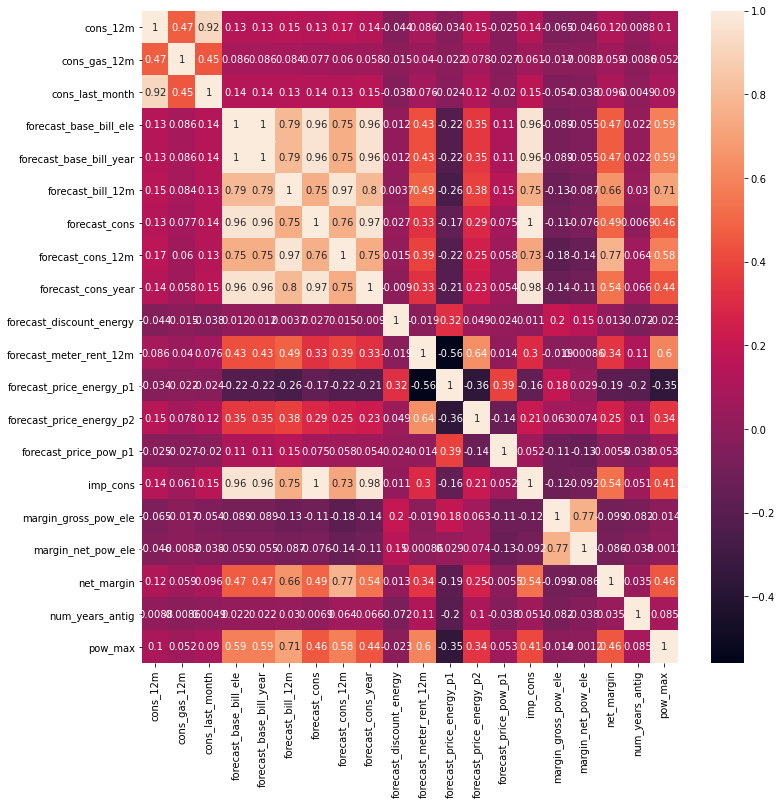

In [61]:
plt.figure(figsize = (12,12))
sns.heatmap(df_data[['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_base_bill_ele',
                    'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons',
                    'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
                    'forecast_meter_rent_12m', 'forecast_price_energy_p1',
                    'forecast_price_energy_p2', 'forecast_price_pow_p1', 'imp_cons',
                    'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin',
                    'num_years_antig', 'pow_max']].corr(), annot = True)
plt.show()

In [62]:
df_data.drop(['forecast_bill_12m', 'forecast_cons', 'date_first_activ', 'forecast_base_bill_ele',
             'forecast_base_bill_year', 'activity_new'], axis = 1, inplace = True)

In [63]:
df_data.isnull().sum()[df_data.isnull().sum() > 0].sort_values(ascending = False)

date_modif_prod             157
forecast_price_pow_p1       126
forecast_price_energy_p2    126
forecast_price_energy_p1    126
forecast_discount_energy    126
date_renewal                 40
net_margin                   15
margin_net_pow_ele           13
margin_gross_pow_ele         13
pow_max                       3
date_end                      2
dtype: int64

In [64]:
df_final = pd.merge(df_data, df_hist, on = 'id')
df_final.shape

(192978, 32)

In [65]:
df_final = pd.merge(df_final, df_out, on = 'id')
df_final.shape

(192978, 33)

In [66]:
df_num = df_final.select_dtypes(include = np.number)
df_cat = df_final.select_dtypes(include = 'object')

In [67]:
df_cat.columns

Index(['id', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'has_gas', 'origin_up', 'price_date'],
      dtype='object')

In [68]:
df_num.columns

Index(['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'year_activ',
       'price_p1_var', 'price_p2_var', 'price_p3_var', 'price_p1_fix',
       'price_p2_fix', 'price_p3_fix', 'churn'],
      dtype='object')

In [69]:
df_final['churn'].value_counts(1)*100

0    90.104053
1     9.895947
Name: churn, dtype: float64

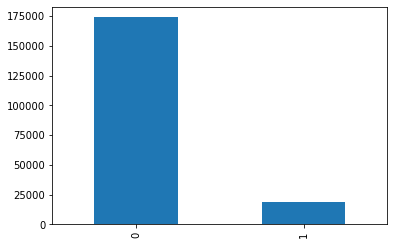

In [70]:
df_final['churn'].value_counts().plot(kind = 'bar')
plt.show()

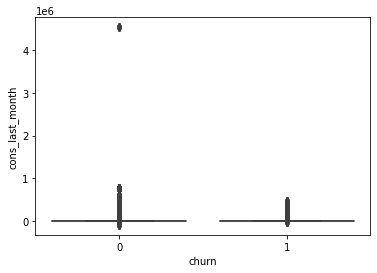

In [71]:
sns.boxplot(x = df_final['churn'], y = df_final['cons_last_month'])
plt.show()

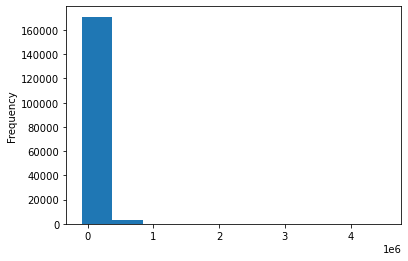

In [72]:
df_final[df_final['churn'] == 0]['cons_last_month'].plot(kind = 'hist')
plt.show()

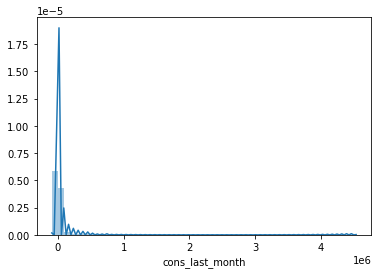

In [73]:
sns.distplot(df_final['cons_last_month'])
plt.show()

cons_12m 6.036910810598485


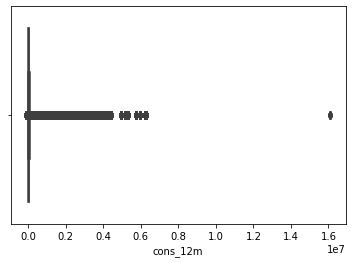

cons_gas_12m 9.52797827373268


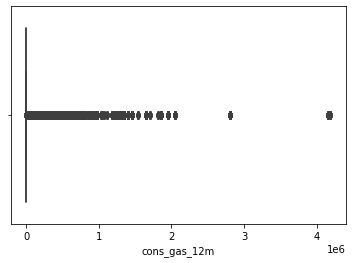

cons_last_month 14.759481780337476


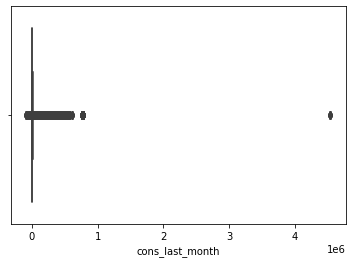

forecast_cons_12m 6.974320507933616


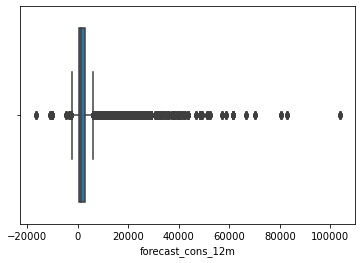

forecast_cons_year 11.36397103563841


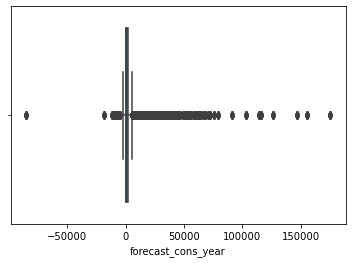

forecast_discount_energy 5.101864529872488


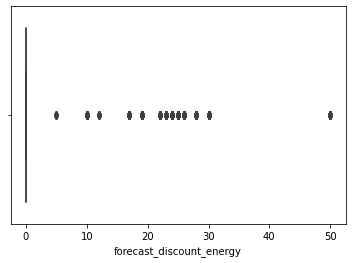

forecast_meter_rent_12m 3.485337285568247


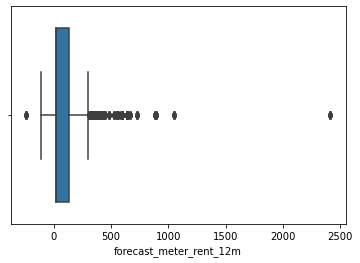

forecast_price_energy_p1 0.22379349786702918


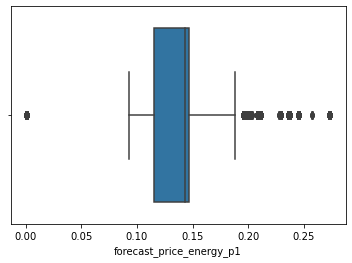

forecast_price_energy_p2 -0.12371568327967966


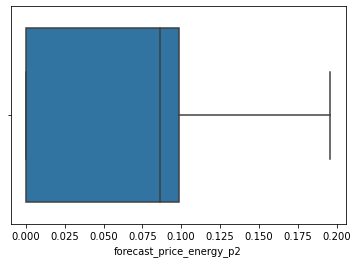

forecast_price_pow_p1 -2.5259552773003398


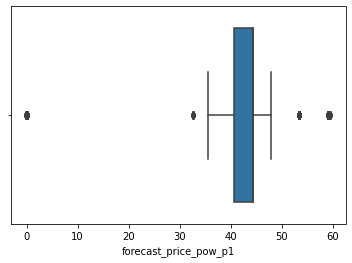

imp_cons 9.651627470051249


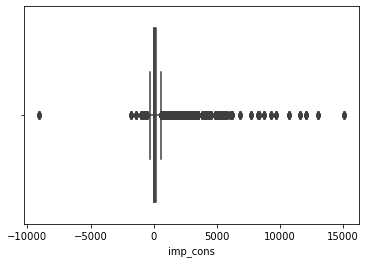

margin_gross_pow_ele 1.0463449683593893


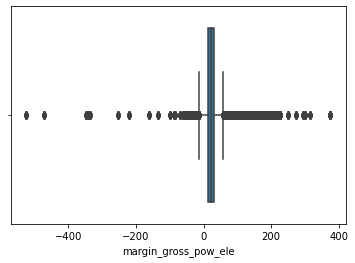

margin_net_pow_ele -3.124726174959223


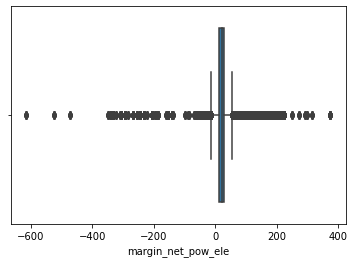

nb_prod_act 16.811803461160537


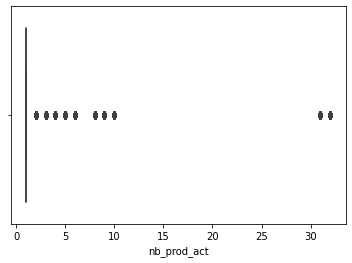

net_margin 21.32589158278765


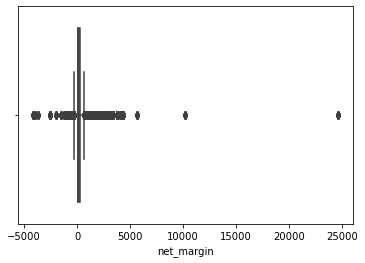

num_years_antig 1.4406761556393382


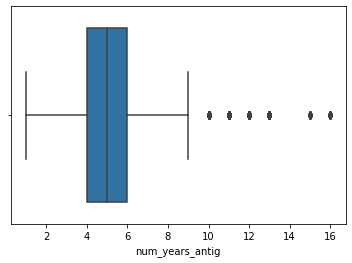

pow_max 6.952793851610985


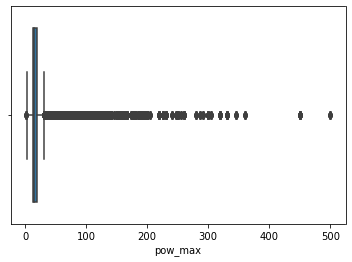

year_activ -1.2535341259321944


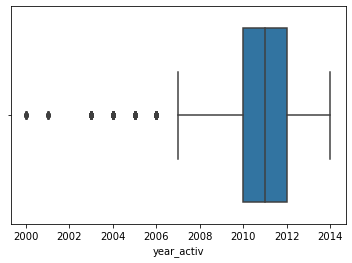

price_p1_var -0.3065711696475128


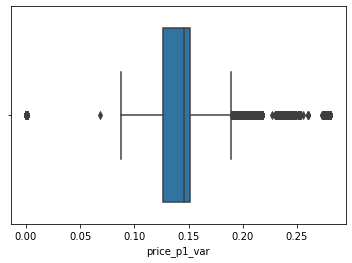

price_p2_var -0.12043583782724634


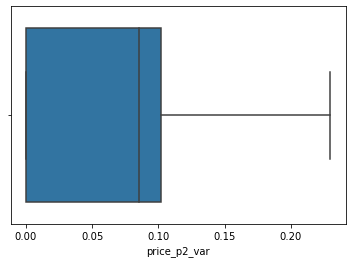

price_p3_var 0.3545907675446967


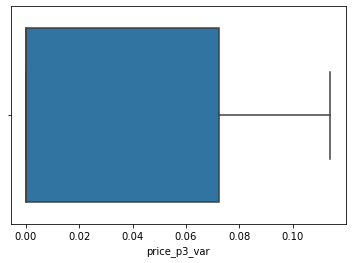

price_p1_fix -2.8876390341295473


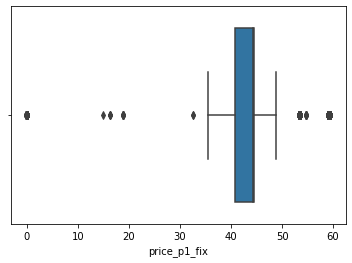

price_p2_fix 0.46099899228553914


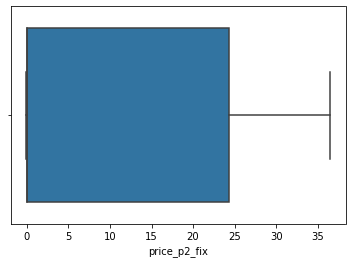

price_p3_fix 0.4222330980122788


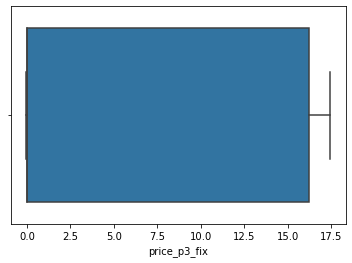

churn 2.686091501674855


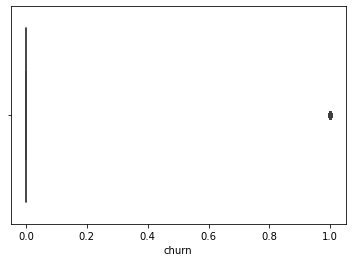

In [74]:
for i in df_num.columns:
    print(i, df_num[i].skew())
    sns.boxplot(df_num[i], orient = 'horizontal')
    plt.show()

C:\Users\anura\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\anura\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


cons_12m nan


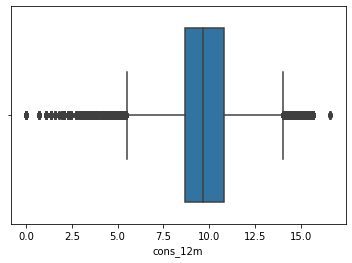

C:\Users\anura\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


cons_gas_12m 1.853491672742652


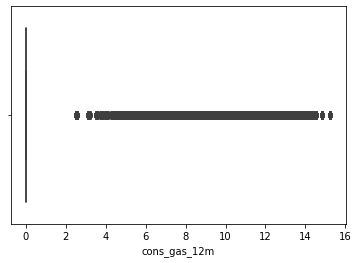

C:\Users\anura\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


cons_last_month -0.23548850080944472


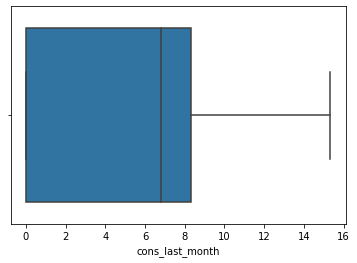

C:\Users\anura\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


forecast_cons_12m -1.7882112835289914


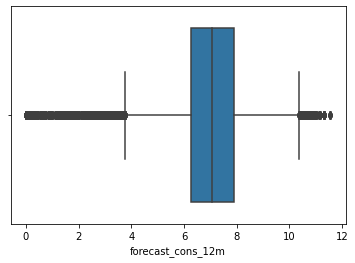

C:\Users\anura\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


forecast_cons_year -0.15713626931669145


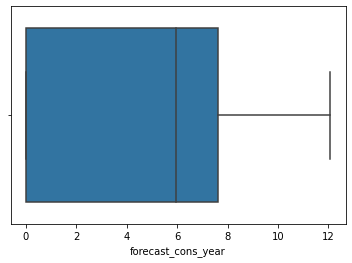

forecast_discount_energy 4.976517003939752


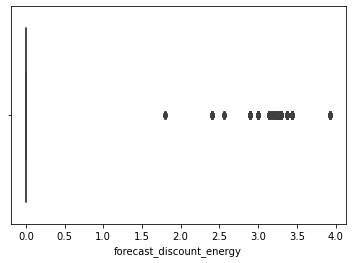

forecast_meter_rent_12m -0.6199078308809434


C:\Users\anura\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


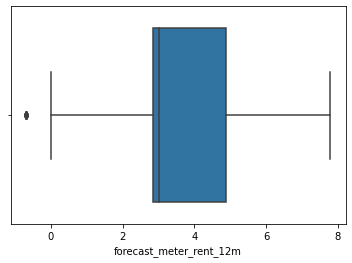

forecast_price_energy_p1 -0.09265287935420627


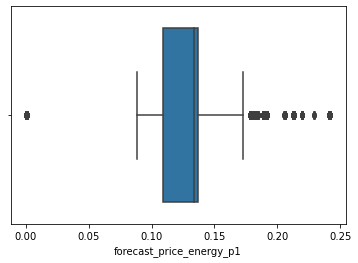

forecast_price_energy_p2 -0.13127855009322015


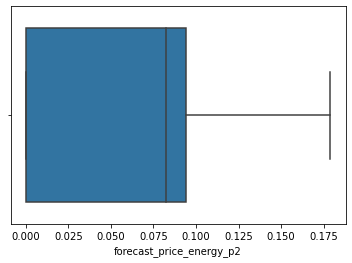

forecast_price_pow_p1 -11.215679082385375


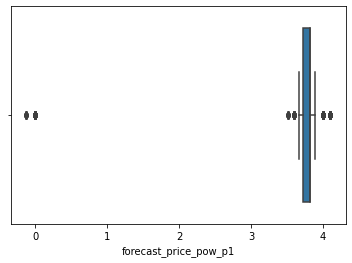

imp_cons -0.014135693804429372


C:\Users\anura\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


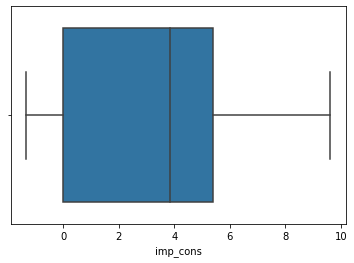

C:\Users\anura\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\anura\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


margin_gross_pow_ele nan


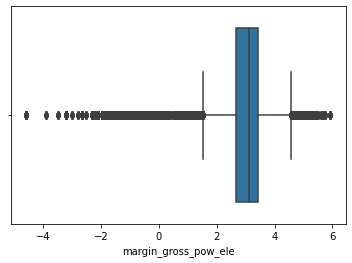

C:\Users\anura\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\anura\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


margin_net_pow_ele nan


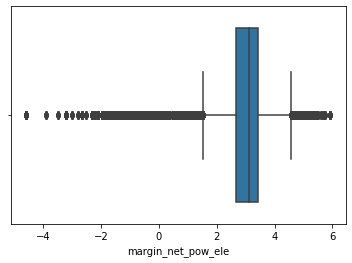

nb_prod_act 3.7591188582268775


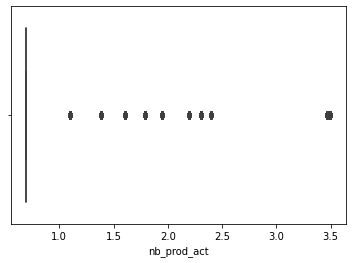

C:\Users\anura\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


net_margin -0.8616682223369129


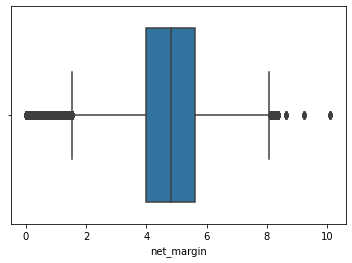

num_years_antig 0.41097822991007255


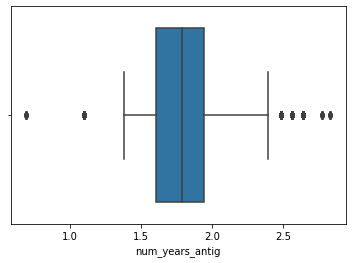

pow_max 1.8675708575448244


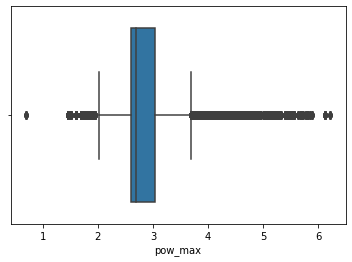

year_activ -1.2579448086780882


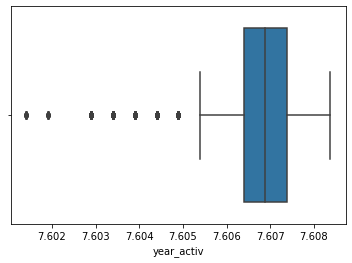

price_p1_var -0.7129719802048808


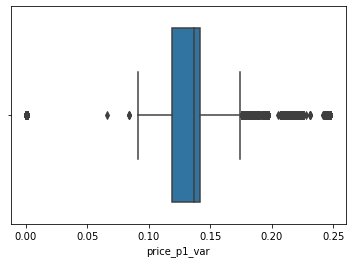

price_p2_var -0.12752651921061375


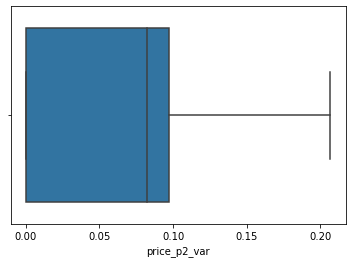

price_p3_var 0.3527198550842018


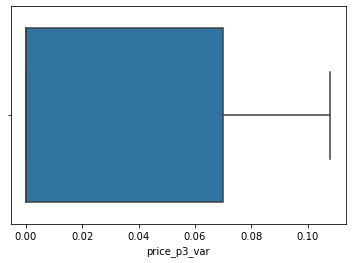

price_p1_fix -10.28320783209187


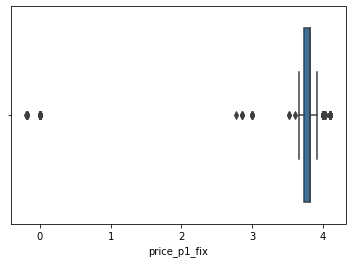

price_p2_fix 0.3431576238922807


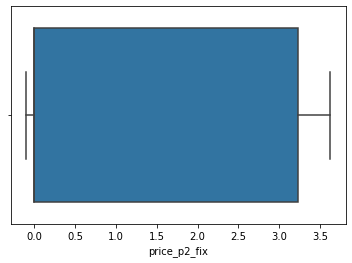

price_p3_fix 0.3562054095423189


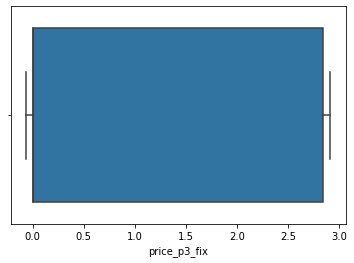

churn 2.6860915016748557


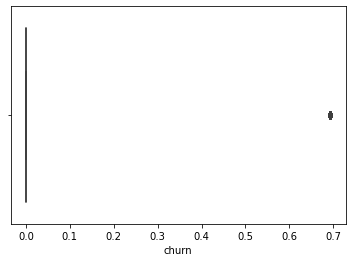

In [75]:
for i in df_num.columns:
    print(i, np.log1p(df_num[i]).skew())
    sns.boxplot(np.log1p(df_num[i]), orient = 'horizontal')
    plt.show()

In [76]:
skw = pd.DataFrame()
skw['normal_skew'] = df_num.skew()
skw['log_skew'] = np.log1p(df_num).skew()
skw.index = df_num.columns
skw

<ipython-input-76-e8038288b076>:3: RuntimeWarning: divide by zero encountered in log1p
  skw['log_skew'] = np.log1p(df_num).skew()
<ipython-input-76-e8038288b076>:3: RuntimeWarning: invalid value encountered in log1p
  skw['log_skew'] = np.log1p(df_num).skew()


,normal_skew,log_skew
cons_12m,6.036911,NaN
cons_gas_12m,9.527978,1.853492
cons_last_month,14.759482,-0.235489
forecast_cons_12m,6.974321,-1.788211
forecast_cons_year,11.363971,-0.157136
forecast_discount_energy,5.101865,4.976517
forecast_meter_rent_12m,3.485337,-0.619908
forecast_price_energy_p1,0.223793,-0.092653
forecast_price_energy_p2,-0.123716,-0.131279
forecast_price_pow_p1,-2.525955,-11.215679


In [77]:
df_data.isnull().sum()[df_data.isnull().sum() > 0]

date_end                      2
date_modif_prod             157
date_renewal                 40
forecast_discount_energy    126
forecast_price_energy_p1    126
forecast_price_energy_p2    126
forecast_price_pow_p1       126
margin_gross_pow_ele         13
margin_net_pow_ele           13
net_margin                   15
pow_max                       3
dtype: int64

In [78]:
df_hist.isnull().sum()[df_hist.isnull().sum() > 0]

Series([], dtype: int64)

In [79]:
df_out.isnull().sum()[df_out.isnull().sum() > 0]

Series([], dtype: int64)

In [81]:
df_hist_num = df_hist.select_dtypes(include = np.number)
for i in df_hist_num.columns:
    if(any(df_hist[i] < 0)):
        print(i)

price_p1_fix
price_p2_fix
price_p3_fix


In [82]:
for i in df_hist_num.columns:
    print(i)
    print(df_hist[df_hist[i] < 0].shape[0])
    print()

price_p1_var
(0, 8)

price_p2_var
(0, 8)

price_p3_var
(0, 8)

price_p1_fix
(10, 8)

price_p2_fix
(9, 8)

price_p3_fix
(9, 8)



In [83]:
for i in df_hist_num.columns:
    df_hist.loc[df_hist[i] < 0, i] = df_hist[i].median()

In [84]:
for i in df_hist_num.columns:
    print(i)
    print(df_hist[df_hist[i] < 0].shape[0])
    print()

price_p1_var
0

price_p2_var
0

price_p3_var
0

price_p1_fix
0

price_p2_fix
0

price_p3_fix
0



In [86]:
df_data.loc[df_data['date_end'].isnull(), 'date_end'] = df_data['date_end'].mode()[0]
df_data.loc[df_data['date_modif_prod'].isnull(), 'date_modif_prod'] = df_data['date_modif_prod'].mode()[0]
df_data.loc[df_data['date_renewal'].isnull(), 'date_renewal'] = df_data['date_renewal'].mode()[0]

In [87]:
df_data['date_activ'] = pd.to_datetime(df_data['date_activ'], format = '%Y-%m-%d')
df_data['date_end'] = pd.to_datetime(df_data['date_end'], format = '%Y-%m-%d')
df_data['date_modif_prod'] = pd.to_datetime(df_data['date_modif_prod'], format = '%Y-%m-%d')
df_data['date_renewal'] = pd.to_datetime(df_data['date_renewal'], format = '%Y-%m-%d')

In [88]:
for i in df_data.isnull().sum()[df_data.isnull().sum() > 0].index:
    df_data.loc[df_data[i].isnull(), i] = df_data[i].median()

In [89]:
df_data.isnull().sum()[df_data.isnull().sum() > 0]

Series([], dtype: int64)

In [90]:
df_data.to_csv('data.csv', index = False)
df_hist.to_csv('hist.csv', index = False)
df_out.to_csv('out.csv', index = False)

In [9]:
std = {"joe":26,"eve":23,"james":28, "adam" : 26}

In [11]:
std['joe'] = 5
std

{'joe': 5, 'eve': 23, 'james': 28, 'adam': 26}

In [13]:
nm = "python"
nm[::-1]

'nohtyp'

In [14]:
d = ('name','age','gender')

In [16]:
dict.fromkeys(d)

{'name': None, 'age': None, 'gender': None}

In [24]:
string = "madam"
a = [(i.upper(), len(i)) for i in string]
print(a)

[('M', 1), ('A', 1), ('D', 1), ('A', 1), ('M', 1)]


In [25]:
if None:
    print("Hello")

In [23]:
i = sum = 0
while i <= 4:
    sum += i
    i = i+1
print(sum)

10


In [26]:
def func():
    print("You are welcome to func")
    print(var)
func()

You are welcome to func


NameError: name 'var' is not defined

In [31]:
oct(2)

'0o2'

In [36]:
def code():
    for numbers in '1234':
        for letters in 'abc':
            print(len(nubers),len(letters))
code().sum()

NameError: name 'nubers' is not defined

In [37]:
def addition(*args):
    return bin(args)
addition(10,10)

TypeError: 'tuple' object cannot be interpreted as an integer

In [38]:
def num(*args):
    return enumerate(*args)
list(num(('123')))

[(0, '1'), (1, '2'), (2, '3')]

In [44]:
hex(11)

'0xb'

In [1]:
import numpy as np
import pandas as pd

In [10]:
a=np.arange(5j,0,2)

In [11]:
a

array([], dtype=complex128)

In [14]:
np.arange(5j)

array([], dtype=complex128)

In [15]:
demo_matrix = np.array(([13,35,74,48], [23,37,37,38],[73,39,93,39]))

demo_matrix[:, (1,2)]

array([[35, 74],
       [37, 37],
       [39, 93]])

In [16]:
a=np.arange(15).reshape(3,5)

print(a.size)

15


In [20]:
a=np.random.randint(1,5,2)

a

array([3, 1])

In [21]:
score = [10, 15, 20, 25]

pd.Series(data=score)

0    10
1    15
2    20
3    25
dtype: int64

In [4]:
df = pd.DataFrame(columns = ['ticker', 'hello'])
df

,ticker,hello


In [24]:
df.rename(columns = {'ticker' : 'abbr'})

,abbr,hello


In [31]:
df.append(pd.DataFrame({'ticker' : 2, 'abbr' : 'b'}))
df.append(pd.DataFrame({'ticker' : 1, 'abbr' : 'a'}))

ValueError: If using all scalar values, you must pass an index

In [33]:
df.sort_index(axis = 1)

,hello,ticker


In [ ]:
df.isnan()

In [34]:
import seaborn as sns

In [ ]:
sns.kdeplot()

In [35]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot.polar plot

In [ ]:
df.isin()

In [ ]:
df.filter()

In [3]:
import numpy as np
import pandas as pd

In [2]:
arr = np.array([57, 65, 96, 45, 33, 25, 45, 67, 78, 67])
arr.std()

20.267214904865444

In [8]:
df['hello'] = [1,2,np.nan, 4]
df['ticker'] = ['a', np.nan, 'c', 'd']

In [10]:
df.isnull().sum(axis = 0)

ticker    1
hello     1
dtype: int64

In [13]:
df['hello'].replace(2, np.NaN)

0    1.0
1    NaN
2    NaN
3    4.0
Name: hello, dtype: float64

In [5]:
lst = [12,23,13,45,56]
for i,j in enumerate(lst[2:]):
    print(i,j)

0 13
1 45
2 56
